In [20]:
import seaborn as sns
import statsmodels.tsa.stattools as ts 
import statsmodels.api as sm
from numpy import log, polyfit, sqrt, std, subtract
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
def find_cointegrated_pairs(dataframe, critial_level = 0.05):
    n = dataframe.shape[1] # the length of dateframe
    pvalue_matrix = np.ones((n, n)) # initialize the matrix of p
    keys = dataframe.keys() # get the column names
    pairs = [] # initilize the list for cointegration
    for i in range(n):
        for j in range(i+1, n): # for j bigger than i
            stock1 = dataframe[keys[i]] # obtain the price of two contract
            stock2 = dataframe[keys[j]]
            result = ts.coint(stock1, stock2) # get conintegration
            pvalue = result[1] # get the pvalue
            pvalue_matrix[i, j] = pvalue
            if pvalue < critial_level: # if p-value less than the critical level
                pairs.append((keys[i], keys[j], pvalue)) # record the contract with that p-value
    return pvalue_matrix, pairs

In [28]:
df = pd.read_csv('SMI.csv', index_col='Date', parse_dates=True)
df = df.drop(columns="ALC.SW")
df = df.ffill()

In [29]:
Financial = ['UBSG.SW', 'ZURN.SW', 'CSGN.SW', 'SREN.SW', 'SLHN.SW']
Health_Care = ['ALC.SW', 'LONN.SW', 'NOVN.SW', 'ROG.SW']
Industrials = ['ABBN.SW', 'ADEN.SW', 'GEBN.SW', 'LHN.SW', 'SGSN.SW', 'SIKA.SW']
Consumer_Goods = ['NESN.SW', 'CFR.SW', 'UHR.SW']
Basic_Materials = ['GIVN.SW']
Telecommunication = ['SCMN.SW']

In [30]:
start="2010-01-01"
end="2017-01-01"
teststart = "2017-01-02"
testend = "2019-09-01"

In [31]:
corr = df[:end].corr()

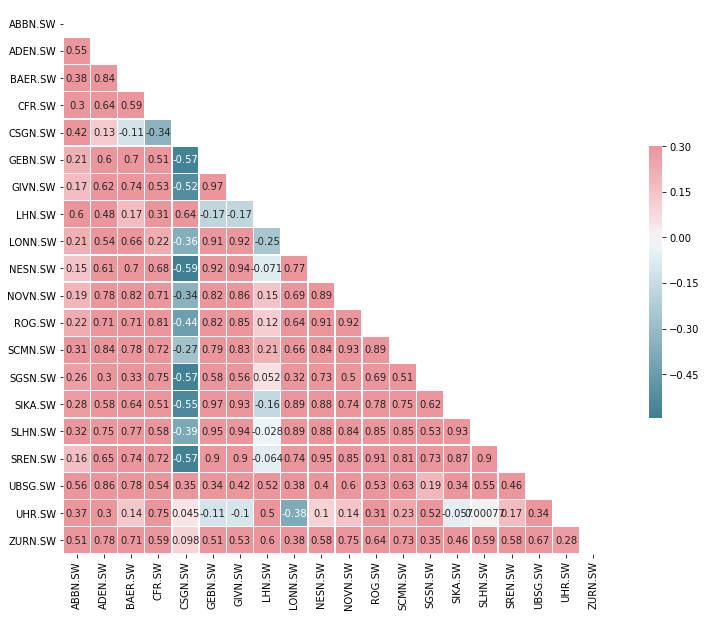

In [32]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [34]:
corr

,ABBN.SW,ADEN.SW,BAER.SW,CFR.SW,CSGN.SW,GEBN.SW,GIVN.SW,LHN.SW,LONN.SW,NESN.SW,NOVN.SW,ROG.SW,SCMN.SW,SGSN.SW,SIKA.SW,SLHN.SW,SREN.SW,UBSG.SW,UHR.SW,ZURN.SW
ABBN.SW,1.000000,0.550570,0.384256,0.300833,0.422434,0.207311,0.171962,0.600087,0.212015,0.152922,0.188851,0.223843,0.305210,0.263232,0.277670,0.316158,0.164498,0.560340,0.370012,0.509598
ADEN.SW,0.550570,1.000000,0.841188,0.639271,0.127480,0.595651,0.624283,0.484724,0.541636,0.609954,0.777268,0.711802,0.839712,0.300325,0.579575,0.750769,0.654659,0.861794,0.300635,0.782489
BAER.SW,0.384256,0.841188,1.000000,0.594873,-0.114284,0.697797,0.735828,0.174033,0.664327,0.701057,0.817521,0.711165,0.784425,0.326382,0.644016,0.773939,0.736783,0.780232,0.138580,0.710045
CFR.SW,0.300833,0.639271,0.594873,1.000000,-0.340376,0.511217,0.525021,0.313542,0.220360,0.681408,0.706816,0.806044,0.717398,0.751033,0.510332,0.577489,0.724347,0.540323,0.751209,0.592586
CSGN.SW,0.422434,0.127480,-0.114284,-0.340376,1.000000,-0.570060,-0.524972,0.637803,-0.362766,-0.593823,-0.343086,-0.436391,-0.266389,-0.573002,-0.551485,-0.389721,-0.574715,0.354652,0.044859,0.098130
GEBN.SW,0.207311,0.595651,0.697797,0.511217,-0.570060,1.000000,0.974889,-0.173683,0.910140,0.923244,0.817118,0.818285,0.790835,0.580309,0.969275,0.946594,0.898079,0.343470,-0.109690,0.514903
GIVN.SW,0.171962,0.624283,0.735828,0.525021,-0.524972,0.974889,1.000000,-0.170159,0.915168,0.939535,0.864356,0.846676,0.825407,0.564038,0.933915,0.942030,0.904680,0.421529,-0.104970,0.526887
LHN.SW,0.600087,0.484724,0.174033,0.313542,0.637803,-0.173683,-0.170159,1.000000,-0.254535,-0.071399,0.148012,0.116683,0.212104,0.052303,-0.162881,-0.028223,-0.063632,0.522175,0.501914,0.600045
LONN.SW,0.212015,0.541636,0.664327,0.220360,-0.362766,0.910140,0.915168,-0.254535,1.000000,0.773909,0.690854,0.638185,0.657983,0.315114,0.889485,0.888500,0.738400,0.383692,-0.380894,0.384827
NESN.SW,0.152922,0.609954,0.701057,0.681408,-0.593823,0.923244,0.939535,-0.071399,0.773909,1.000000,0.892540,0.913006,0.837697,0.729432,0.882138,0.882005,0.952646,0.397463,0.103073,0.579723


In [25]:
df.head()

,ABBN.SW,ADEN.SW,BAER.SW,CFR.SW,CSGN.SW,GEBN.SW,GIVN.SW,LHN.SW,LONN.SW,NESN.SW,NOVN.SW,ROG.SW,SCMN.SW,SGSN.SW,SIKA.SW,SLHN.SW,SREN.SW,UBSG.SW,UHR.SW,ZURN.SW
Date,,,,,,,,,,,,,,,,,,,,
2010-01-04,20.250000,58.500000,36.204800,35.540001,49.025299,183.399994,834.0,77.571404,71.787399,50.950001,48.662800,180.699997,398.600006,1374.0,27.5833,135.800003,51.099998,16.500000,267.600006,230.000000
2010-01-05,20.350000,60.299999,35.755501,35.720001,49.483101,185.800003,826.5,77.047600,71.833801,49.750000,47.823002,178.300003,398.899994,1365.0,27.8333,139.500000,52.000000,16.639999,270.600006,235.000000
2010-01-06,20.500000,61.200001,35.384201,35.970001,48.613300,185.000000,843.5,78.333298,70.814796,48.959999,47.912300,179.500000,396.000000,1355.0,28.0000,139.199997,52.849998,16.530001,272.000000,234.100006
2010-01-07,20.770000,63.000000,34.973900,36.270000,50.535900,184.399994,847.0,78.476196,71.648499,48.400002,47.557800,178.000000,393.700012,1362.0,27.9167,145.199997,52.299999,16.580000,277.399994,230.899994
2010-01-08,21.049999,63.099998,35.325600,36.470001,51.314098,185.300003,863.0,78.380997,73.130600,49.110001,47.557800,178.500000,392.799988,1371.0,27.7500,144.699997,52.950001,17.209999,281.000000,232.399994


In [41]:
pvalue_matrix, pairs = find_cointegrated_pairs(df)

In [38]:
p_values = pd.DataFrame(pairs)

p_values.columns = ['S1', 'S2', 'Pvalue']
p_values = p_values.sort_values(by=['Pvalue']).reset_index(drop=True)
p_values.index.names = ['id']

In [45]:
len(pairs)

8

In [44]:
pairs[0][0]

'ABBN.SW'

In [40]:
p_values.to_csv('pvalues.csv')